In [10]:
%matplotlib widget

from dataclasses import dataclass
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi
from typing import Callable
from montecarlo import monte_carlo, MonteCarloEstimate

MC estimate with 100000 trials with 100 steps in each trial for P(S>10): 8.004200e-01


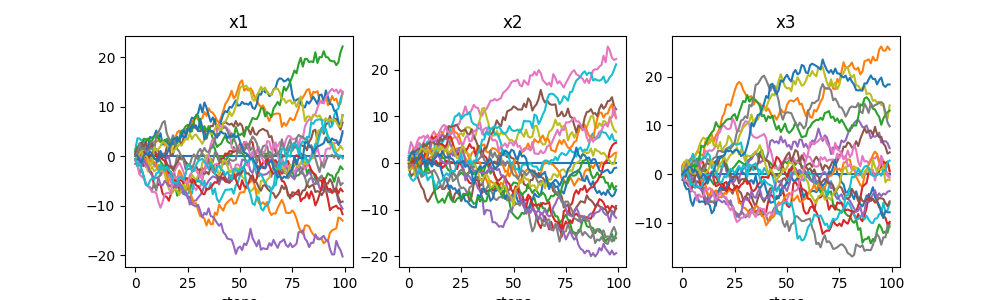

In [11]:
# 2.2.a functions for 3-d rw
S = 10
NSTEPS = 100
NTRIALS = 10**5


def gaus_rw_steps(ntrials):
    """sample_generator, Generate random walks for a number of trials"""
    return np.random.randn(ntrials, NSTEPS, 3)


def gaus_rw(ntrials):
    """sample_generator, Generate random walks for a number of trials"""
    return np.concatenate((np.zeros((1, NSTEPS, 3)), np.cumsum(gaus_rw_steps(ntrials), axis=1)))


# plot the random walk
samples = gaus_rw(20)
fig, ax = plt.subplots(1, 3, figsize=(10, 3))
for sample in samples:
    ax[0].plot(sample[:, 0])
    ax[1].plot(sample[:, 1])
    ax[2].plot(sample[:, 2])

ax[0].set_title("x1")
ax[1].set_title("x2")
ax[2].set_title("x3")
ax[0].set_xlabel("steps")
ax[1].set_xlabel("steps")
ax[2].set_xlabel("steps")

fig.savefig("figs/3.4.svg")

# 2.2.b Monte Carlo estimate for P(S>10)


def gaus_rw_test(samples):
    """g_evaluator, Evaluate the indicator function for total distance travelled, S > 10"""
    return np.where(np.linalg.norm(np.sum(samples, axis=1), axis=1) > S, 1, 0)


mc_est = monte_carlo(NTRIALS, gaus_rw_steps, gaus_rw_test)
print(
    f"MC estimate with {NTRIALS} trials with {NSTEPS} steps in each trial for P(S>10): {mc_est.estimate:e}")

In [13]:
# 2.2.c importance sampling
# NOTE: I removed code that was not working because
S_IS = 55

# def prop_gauss_rw(ntrials):
# """proposal_sampler, Generate a random walk from a sequence of steps"""

# def prop_gauss_rw_pdf(samples):
# """proposal_pdf_evaluator, Evaluate the pdf of the proposal distribution"""

# def gauss_rw_pdf(samples):
# """base_pdf_evaluator, Evaluate the pdf of the proposal distribution"""


def gaus_rw_test_55(samples):
    """g_evaluator, Evaluate the indicator function for total distance travelled, S > 10"""
    return np.where(np.linalg.norm(np.sum(samples, axis=1), axis=1) > S_IS, 1, 0)

# is_est = importance_sampling(
    # ntrials, prop_gauss_rw, prop_gauss_rw_pdf, gauss_rw_pdf, gauss_rw_test)


mc_est_55 = monte_carlo(NTRIALS, gaus_rw_steps, gaus_rw_test_55)
print(
    f"MC estimate with {NTRIALS} trials with {NSTEPS} steps in each trial for P(S>55): {mc_est_55.estimate:e}")
analy_sol = 1 - chi.cdf(S_IS/10, 3)
print(
    f"Analytical solution for P(S>{S_IS}): {analy_sol:e}")

MC estimate with 100000 trials with 100 steps in each trial for P(S>55): 0.000000e+00
Analytical solution for P(S>55): 1.222653e-06


In [14]:
# 2.2.d standard error
mc_10_se = np.sqrt(np.var(mc_est.evaluations)/NTRIALS)

print(
    f"Standard error for P(S>10) with {NTRIALS} trials with {NSTEPS} steps in each trial: {mc_10_se:e}")

Standard error for P(S>10) with 100000 trials with 100 steps in each trial: 1.263914e-03
